In [1]:
# Nama    : Hendry Winata
# NIM     : 191402072
# Lab     : A2
# Dataset : https://www.kaggle.com/datasets/hellbuoy/car-price-prediction

# import beberapa library yang akan digunakan dalam proses
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# memberikan tema grid / garis pada diagram dari sns
sns.set_theme(style="whitegrid")

In [2]:
# mengkonversi terlebih dahulu file CSV yang telah terlampir menjadi dataset
cp_df = pd.read_csv("CarPrice.csv")
cp_df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Pre-Processing

In [3]:
# menampilkan informasi dasar seputar kolom pada dataset
cp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [4]:
# menampilkan informasi ada tidaknya missing value pada setiap kolom
cp_df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [5]:
# menampilkan deskripsi untuk kolom non-object pada dataset
# .transpose() berfungsi untuk mentranspose (baris-kolom ke kolom-baris)
cp_df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
car_ID,205.0,103.000000,59.322565,1.00,52.00,103.00,154.00,205.00
symboling,205.0,0.834146,1.245307,-2.00,0.00,1.00,2.00,3.00
wheelbase,205.0,98.756585,6.021776,86.60,94.50,97.00,102.40,120.90
carlength,205.0,174.049268,12.337289,141.10,166.30,173.20,183.10,208.10
carwidth,205.0,65.907805,2.145204,60.30,64.10,65.50,66.90,72.30
carheight,205.0,53.724878,2.443522,47.80,52.00,54.10,55.50,59.80
curbweight,205.0,2555.565854,520.680204,1488.00,2145.00,2414.00,2935.00,4066.00
enginesize,205.0,126.907317,41.642693,61.00,97.00,120.00,141.00,326.00
boreratio,205.0,3.329756,0.270844,2.54,3.15,3.31,3.58,3.94
stroke,205.0,3.255415,0.313597,2.07,3.11,3.29,3.41,4.17


In [6]:
# menampilkan deskripsi untuk kolom object pada dataset
cp_df.describe(include='object')

,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205
unique,147,2,2,2,5,3,2,7,7,8
top,toyota corona,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,6,185,168,115,96,120,202,148,159,94


In [7]:
# menghapus kolom car_ID karena tidak memiliki fungsi dalam pengolahan kali ini
cp_df.drop(['car_ID'], axis=1, inplace=True)
cp_df.head()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,168.8,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,171.2,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,176.6,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,176.6,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


# Exploratory Data Analysis

## Identifikasi Kolom

In [8]:
# menampilkan kategori-kategori yang ada pada kolom yang bersifat categorical secara arti
for column in ['symboling','fueltype','aspiration','doornumber','carbody','drivewheel','enginelocation','enginetype','cylindernumber','fuelsystem']:
  print(column)
  print(cp_df[column].unique(), end="\n\n")

symboling
[ 3  1  2  0 -1 -2]

fueltype
['gas' 'diesel']

aspiration
['std' 'turbo']

doornumber
['two' 'four']

carbody
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

drivewheel
['rwd' 'fwd' '4wd']

enginelocation
['front' 'rear']

enginetype
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']

cylindernumber
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']

fuelsystem
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']



In [9]:
cp_df.head().transpose()

,0,1,2,3,4
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4
carlength,168.8,168.8,171.2,176.6,176.6


### "peakrpm"

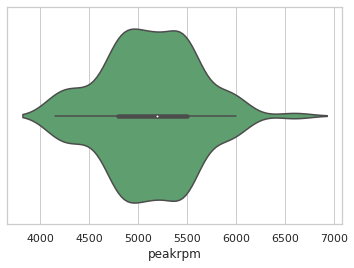

In [10]:
# menampilkan penyebaran nilai dari kolom dengan violinplot dari seaborn
sns.violinplot(x=cp_df['peakrpm'], color='g')

# dari diagram ini, kita dapat mengetahui dominan nilai ada pada 5000an dan juga
# terdapat nilai yang cukup minim pada area 6500an yang berkemungkinan menjadi outlier

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


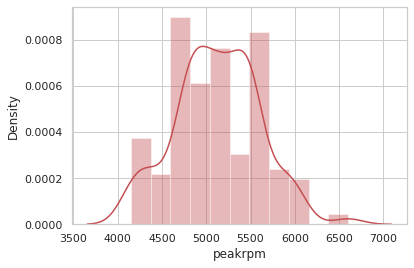

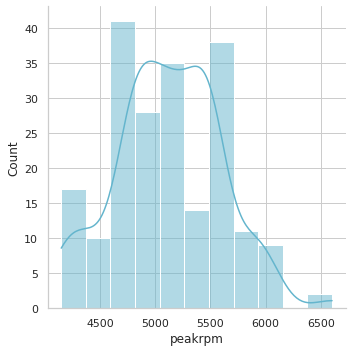

In [11]:
# menampilkan penyebaran nilai dari kolom dengan distplot dari seaborn
sns.distplot(cp_df['peakrpm'], color='r')

# distplot merupakan method yang akan deprecated, dan disarankan menggunakan displot
sns.displot(cp_df['peakrpm'], kde=True, color='c')

# dari diagram di bawah, kita dapat mengetahui bahwa dominan data berada pada jangkauan
# 4000an hingga 6000, namun terdapat juga data yang bernilai kisaran 6500 (outlier: 6600)

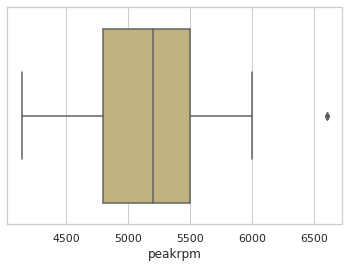

In [12]:
# menampilkan penyebaran nilai dengan boxplot dari seaborn
sns.boxplot(x=cp_df['peakrpm'], color='y')

# dari diagram ini, kita dapat mengetahui:
# Kuartir 1 (Q1) bernilai sekitar 4800
# Median (Q2) bernilai sekitar 5200
# Kuartir 3 (Q3) bernilai sekitar 5500
# Dominan data berada dalam jangkauan 4150 hingga 6000
# Outlier terindikasi pada 6600
# (data ini juga sudah tertera pada describe dari dataset untuk peakrpm)

### "curbweight"

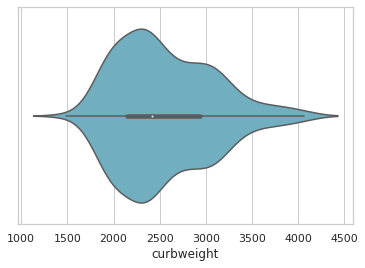

In [13]:
# menampilkan penyebaran nilai dari kolom dengan violinplot dari seaborn
sns.violinplot(x=cp_df['curbweight'], color='c')

# dari diagram ini, kita dapat mengetahui dominan nilai ada pada 2000an dan juga
# terdapat nilai yang cukup minim pada area 1000an yang berkemungkinan menjadi outlier

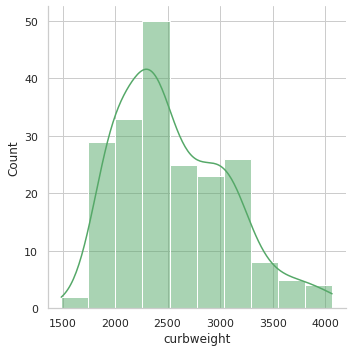

In [14]:
# menampilkan penyebaran nilai dari kolom dengan displot dari seaborn
sns.displot(cp_df['curbweight'], kde=True, color='g')

# dari diagram di bawah, kita dapat mengetahui bahwa dominan data berada pada jangkauan
# 1500an hingga 4000an, dari sini kita belum dapat mengindikasikan adanya outlier

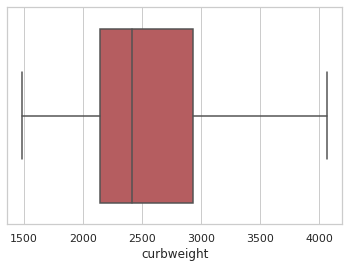

In [15]:
# menampilkan penyebaran nilai dengan boxplot dari seaborn
sns.boxplot(x=cp_df['curbweight'], color='r')

# dari diagram ini, kita dapat mengetahui:
# Kuartir 1 (Q1) bernilai sekitar 2150
# Median (Q2) bernilai sekitar 2400
# Kuartir 3 (Q3) bernilai sekitar 2900
# Dominan data berada dalam jangkauan 1500an hingga 4000an
# Tidak ada Outlier yang terindikasi

### "horsepower"

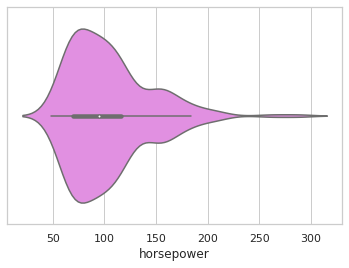

In [16]:
# menampilkan penyebaran nilai dari kolom dengan violinplot dari seaborn
sns.violinplot(x=cp_df['horsepower'], color='violet')

# dari diagram ini, kita dapat mengetahui dominan nilai ada pada 100an dan juga
# terdapat nilai yang cukup minim pada area 300an yang berkemungkinan menjadi outlier

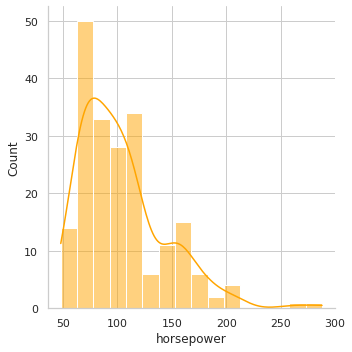

In [17]:
# menampilkan penyebaran nilai dari kolom dengan displot dari seaborn
sns.displot(cp_df['horsepower'], kde=True, color='orange')

# dari diagram di bawah, kita dapat mengetahui bahwa dominan data berada pada jangkauan
# 50an hingga 200an, namun terdapat juga data yang bernilai kisaran 250an (outlier)

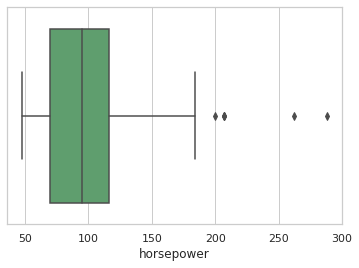

In [18]:
# menampilkan penyebaran nilai dengan boxplot dari seaborn
sns.boxplot(x=cp_df['horsepower'], color='g')

# dari diagram ini, kita dapat mengetahui:
# Kuartir 1 (Q1) bernilai sekitar 70
# Median (Q2) bernilai sekitar 95
# Kuartir 3 (Q3) bernilai sekitar 115
# Dominan data berada dalam jangkauan 50an hingga 180an
# Outlier terindikasi pada sekitar 200, 210, 265, dan 290

## Identifikasi hubungan antar-variabel

### "carbody" - "price"

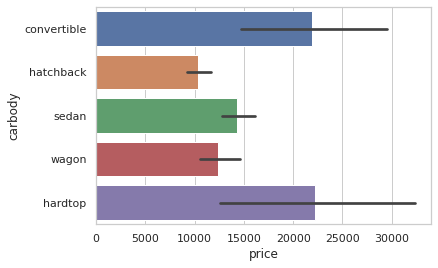

In [19]:
# menampilkan hubungan carbody dan price dengan barplot dari seaborn
sns.barplot(x="price", y="carbody", data=cp_df)

# dari diagram ini, kita dapat mengetahui nilai rata-rata price untuk masing-masing
# kategori carbody dengan melihat pada panjang dari balok berwarna, juga dengan
# nilai error tiap kategori yang memungkinkan ada pada garis hitam (error bar)
# pada setiap balok. dengan mengetahui nilai rata-rata, kita dapat memprediksi
# nilai lain yang berkemungkinan menjadi outlier jika berjarak jauh dengan mean

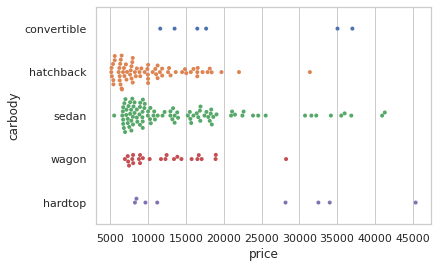

In [20]:
# menampilkan hubungan carbody dan price dengan penyebaran melalui swarmplot dari seaborn
sns.swarmplot(x="price", y="carbody", data=cp_df, s=4)

# dari diagram ini, kita dapat mengetahui dominan price berdasarkan kategori
# terletak pada jangkauan mana, sehingga titik yang berjarak jauh dari nilai
# mean pada barplot sebelumnya akan berkemungkinan menjadi outlier, contohnya
# nilai 3000an-4000an pada kategori sedan

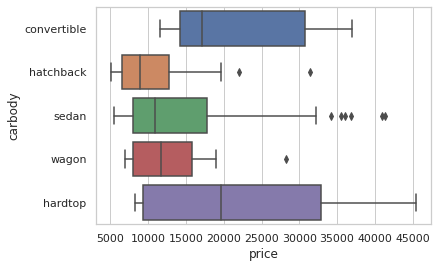

In [21]:
# menampilkan hubungan carbody dan price dengan boxplot dari seaborn
sns.boxplot(x=cp_df['price'], y=cp_df['carbody'], orient='h')

# dari diagram ini, kita dapat mengetahui outlier untuk nilai price dari setiap
# kategori carbody, teruntuk kategori convertible dan hardtop akan memiliki
# jangkauan boxplot yang luas karena nilai yang ada relatif berjauhan

### "horsepower" - "price"

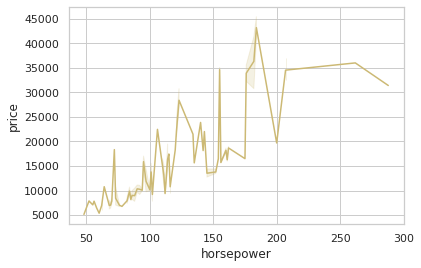

In [22]:
# menampilkan hubungan horsepower dan price dengan lineplot dari seaborn
sns.lineplot(x='horsepower', y='price', data=cp_df, color='y')

# dari diagram ini, kita dapat mengetahui bahwa gambaran umumnya horsepower
# berbanding lurus dengan price karena grafik dominan menanjak ke atas

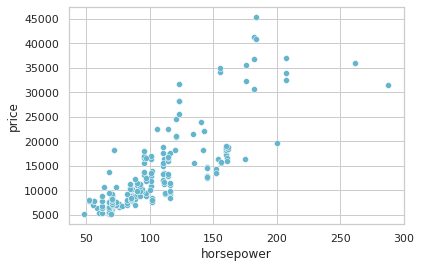

In [23]:
# menampilkan hubungan horsepower dan price dengan scatterplot dari seaborn
sns.scatterplot(x='horsepower', y='price', data=cp_df, color='c')

# dari diagram ini, kita mengetahui bahwa dominan mobil yang ada memiliki
# horsepower di bawah 200 dengan price dominan di bawah 30000, juga kita dapat
# memiliki bayang-bayang bahwa horsepower berbanding lurus dengan price

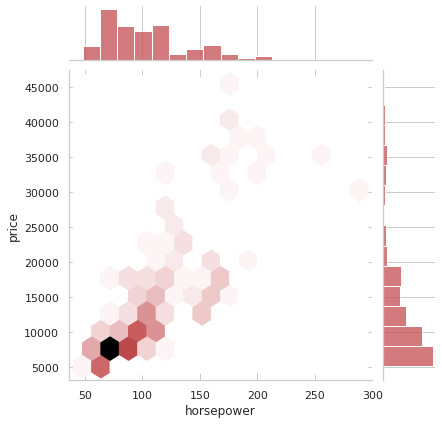

In [24]:
# menampilkan hubungan horsepower dan price dengan jointplot (hex) seaborn
sns.jointplot(x='horsepower', y='price', data=cp_df, kind='hex', color='r')

# dari diagram ini, kita dapat mengetahui dominan jangkauan price yang ada
# berdasarkan dominan horsepower mobil yang terdata, dominan mobil memiliki
# horsepower 70an dengan harga 7500an

### "price" - beberapa atribut lain

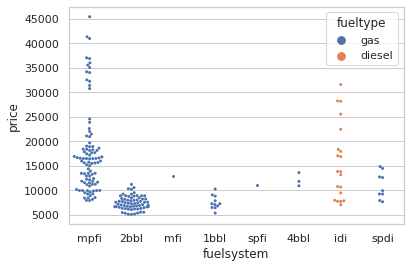

In [25]:
# menampilkan hubungan price dan atribut fuel dengan swarmplot dari seaborn
sns.swarmplot(x='fuelsystem', y='price', hue='fueltype', data=cp_df, s=3)

# dari diagram ini, kita dapat mengetahui bahwa mobil dengan fueltype diesel
# memiliki harga yang lebih merata ke beberapa tingkat price, sedangkan mobil
# dengen fueltype gas dominan memiliki price di bawah 25000, dengan fuelsystem
# mpfi yang memiliki price cukup merata hingga 450000

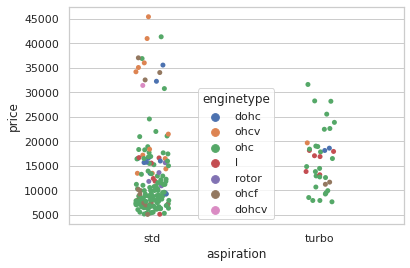

In [26]:
# menampilkan hubungan price dan atribut mesin dengan stripplot dari seaborn
sns.stripplot(x='aspiration', y='price', hue='enginetype', data=cp_df)

# dari diagram ini, kita dapat mengetahui bahwa mobil dengan aspiration standard
# dapat memiliki price yang lebih mahal dibandingkan turbo namun secara dominan
# memiliki price di bawah 250000, dan juga mobil dengan aspiration turbo tidak
# memiliki enginetype rotor dan dohcv

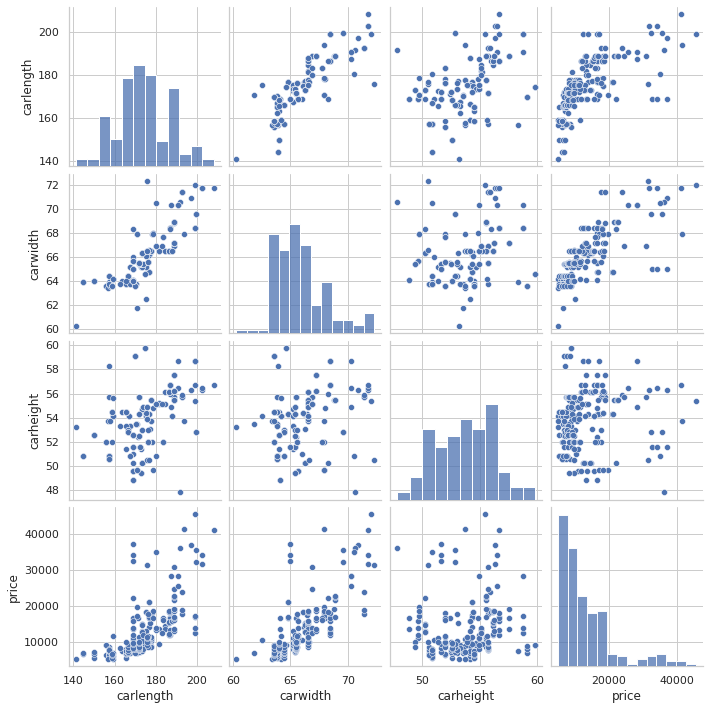

In [27]:
# menampilkan hubungan antar atribut 3 dimensi ukuran mobil dan price
sns.pairplot(cp_df[['carlength','carwidth','carheight','price']])

# dari diagram ini, kita dapat memahami bahwa antara atribut 3 dimensi ukuran
# mobil memiliki samaran hubungan berbanding lurus, begitu juga hubungannya
# dengan atribut price

## Correlation

In [28]:
# menampilkan nilai correlation antar-kolom secara numerik
cp_df.corr()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
symboling,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443
compressionratio,-0.178515,0.249786,0.158414,0.181129,0.261214,0.151362,0.028971,0.005197,0.186110,1.000000,-0.204326,-0.435741,0.324701,0.265201,0.067984


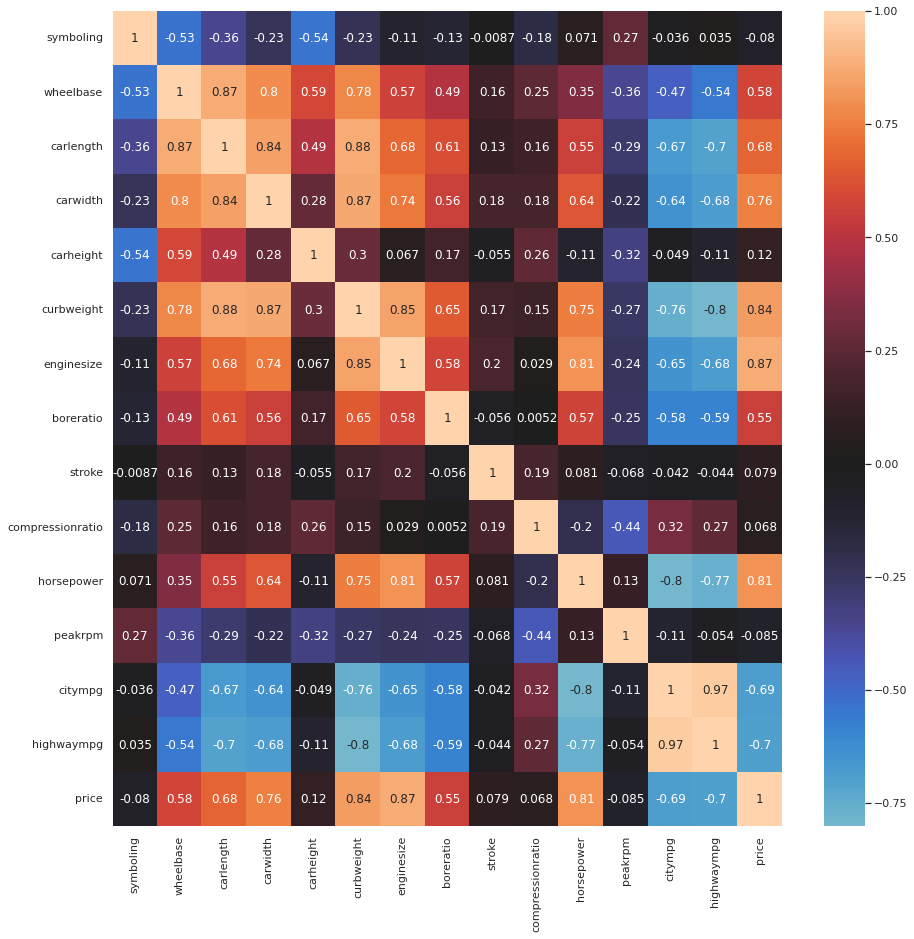

In [29]:
# menampilkan nilai correlation dalam bentuk heatmap dari seaborn
sns.set(rc = {'figure.figsize': (15,15)})
sns.heatmap(cp_df.corr(), center=0, annot=True)

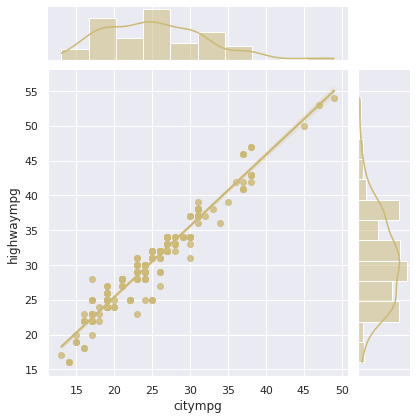

In [30]:
# correlation citympg - highwaympg
sns.jointplot(x='citympg', y='highwaympg', data=cp_df, kind='reg', color='y')
# berdasarkan nilai correlation 0.97 dan juga grafik, kita dapat memahami bahwa
# atribut citympg dan highwaympg memiliki hubungan yang erat dan berbanding lurus

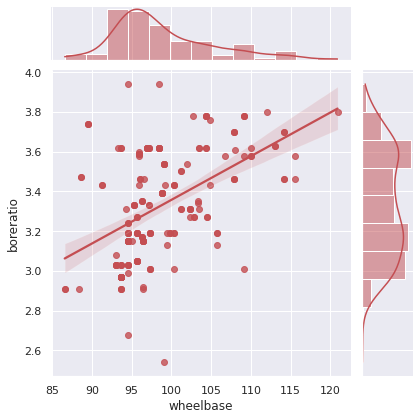

In [31]:
# correlation wheelbase - boreratio
sns.jointplot(x='wheelbase', y='boreratio', data=cp_df, kind='reg', color='r')
# berdasarkan nilai correlation 0.49 dan juga grafik, kita dapat memahami bahwa
# atribut wheelbase dan boreratio memiliki hubungan berbanding lurus

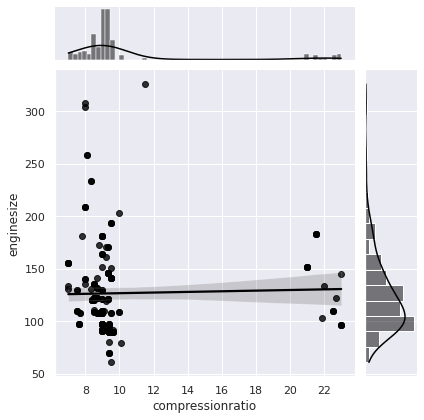

In [32]:
# correlation compressionratio - enginesize
sns.jointplot(x='compressionratio', y='enginesize', data=cp_df, kind='reg', color='black')
# berdasarkan nilai correlation 0.029 dan juga grafik, kita dapat memahami bahwa
# atribut compressionratio dan enginesize dapat dikatakan tidak memiliki hubungan

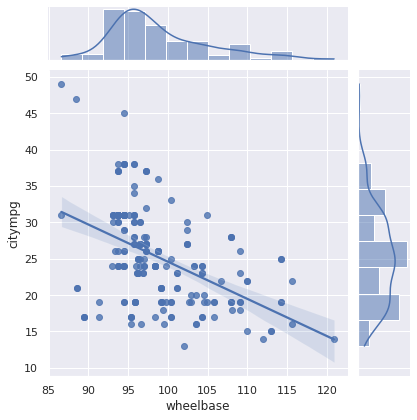

In [33]:
# correlation wheelbase - citympg
sns.jointplot(x='wheelbase', y='citympg', data=cp_df, kind='reg', color='b')
# berdasarkan nilai correlation -0.47 dan juga grafik, kita dapat memahami bahwa
# atribut wheelbase dan citympg memiliki hubungan berbanding terbalik

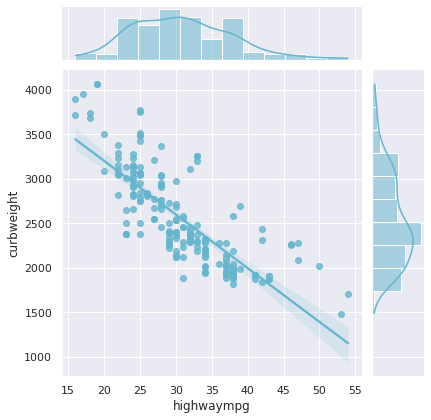

In [34]:
# correlation highwaympg - curbweight
sns.jointplot(x='highwaympg', y='curbweight', data=cp_df, kind='reg', color='c')
# berdasarkan nilai correlation -0.8 dan juga grafik, kita dapat memahami bahwa
# atribut highwaympg dan curbweight memiliki hubungan erat berbanding terbalik

# Linear Regression

In [35]:
# import terlebih dahulu beberapa library yang akan digunakan dalam
# membentuk model linear regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

### enginesize - price

In [36]:
# dengan menggunakan enginesize kita akan memprediksi price dari sebuah mobil
Xep = cp_df[['enginesize']]
Yep = cp_df[['price']]

# sebelumnya persiapkan terlebih dahulu data test dan data train
# kali ini saya menggunakan perbandingan 15:85
Xep_train, Xep_test, Yep_train, Yep_test = train_test_split(Xep, Yep, test_size=0.15)

In [37]:
# kemudian kita bentuk model linear regresssion dengan data train yang telah ada
EP_LR = LinearRegression()
EP_LR.fit(Xep_train, Yep_train)

# tampilkan persamaan garis linear regression dari coef dan intercept hasil latih
print(f"Persamaan garis Linear Regression enginesize-price: price = {EP_LR.coef_} * enginesize + {EP_LR.intercept_}")
# tampilkan juga tingkat akurasi dari hasil latih dengan data test
print(f"Dengan tingkat akurasi sebesar: {EP_LR.score(Xep_test, Yep_test)} = {EP_LR.score(Xep_test, Yep_test) * 100}%")

Persamaan garis Linear Regression enginesize-price: price = [[163.60772692]] * enginesize + [-7531.70533641]
Dengan tingkat akurasi sebesar: 0.860229377539539 = 86.0229377539539%


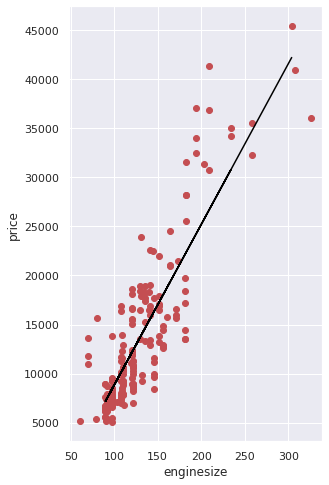

In [38]:
# menampilkan grafik dengan linear regression untuk data test dan hasil prediksinya
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1,2,1)
plt.scatter(Xep, Yep, color='r')
plt.plot(Xep_test, EP_LR.predict(Xep_test), color='black')
plt.xlabel("enginesize")
plt.ylabel("price")
plt.show()

In [39]:
# misalkan kita uji dengan data 200 dengan hasil seharusnya sekitar 25000
print(f"X: {200}\nY (predict): {EP_LR.predict([[200]])}")

X: 200
Y (predict): [[25189.84004748]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### horsepower - price

In [40]:
# dengan menggunakan horsepower kita akan memprediksi price dari sebuah mobil
Xhp = cp_df[['horsepower']]
Yhp = cp_df[['price']]

# sebelumnya persiapkan terlebih dahulu data test dan data train
# kali ini saya menggunakan perbandingan 20:80
Xhp_train, Xhp_test, Yhp_train, Yhp_test = train_test_split(Xhp, Yhp, test_size=0.2)

In [41]:
# kemudian kita bentuk model linear regresssion dengan data train yang telah ada
HP_LR = LinearRegression()
HP_LR.fit(Xhp_train, Yhp_train)

# tampilkan persamaan garis linear regression dari coef dan intercept hasil latih
print(f"Persamaan garis Linear Regression horsepower-price: price = {HP_LR.coef_} * horsepower + {HP_LR.intercept_}")
# tampilkan juga tingkat akurasi dari hasil latih dengan data test
print(f"Dengan tingkat akurasi sebesar: {HP_LR.score(Xhp_test, Yhp_test)} = {HP_LR.score(Xhp_test, Yhp_test) * 100}%")

Persamaan garis Linear Regression horsepower-price: price = [[172.18326049]] * horsepower + [-4453.88554074]
Dengan tingkat akurasi sebesar: 0.6738616734607017 = 67.38616734607017%


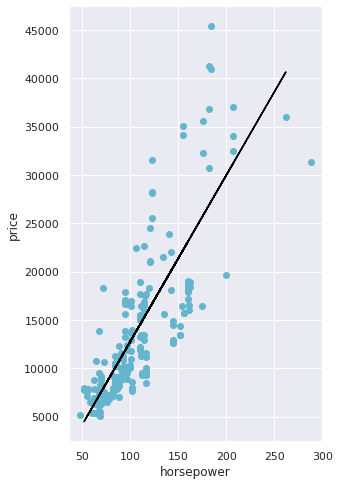

In [42]:
# menampilkan grafik dengan linear regression untuk data test dan hasil prediksinya
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1,2,1)
plt.scatter(Xhp, Yhp, color='c')
plt.plot(Xhp_test, HP_LR.predict(Xhp_test), color='black')
plt.xlabel("horsepower")
plt.ylabel("price")
plt.show()

In [43]:
# misalkan kita uji dengan data 200 dengan hasil seharusnya sekitar 30000
print(f"X: {200}\nY (predict): {HP_LR.predict([[200]])}")

X: 200
Y (predict): [[29982.7665578]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


### curbweight - price

In [44]:
# dengan menggunakan curbweight kita akan memprediksi price dari sebuah mobil
Xcp = cp_df[['curbweight']]
Ycp = cp_df[['price']]

# sebelumnya persiapkan terlebih dahulu data test dan data train
# kali ini saya menggunakan perbandingan 25:75
Xcp_train, Xcp_test, Ycp_train, Ycp_test = train_test_split(Xcp, Ycp, test_size=0.25)

In [45]:
# kemudian kita bentuk model linear regresssion dengan data train yang telah ada
CP_LR = LinearRegression()
CP_LR.fit(Xcp_train, Ycp_train)

# tampilkan persamaan garis linear regression dari coef dan intercept hasil latih
print(f"Persamaan garis Linear Regression curbweight-price: price = {CP_LR.coef_} * curbweight + {CP_LR.intercept_}")
# tampilkan juga tingkat akurasi dari hasil latih dengan data test
print(f"Dengan tingkat akurasi sebesar: {CP_LR.score(Xcp_test, Ycp_test)} = {CP_LR.score(Xcp_test, Ycp_test) * 100}%")

Persamaan garis Linear Regression curbweight-price: price = [[13.25615527]] * curbweight + [-20549.40077599]
Dengan tingkat akurasi sebesar: 0.48838466210574827 = 48.83846621057483%


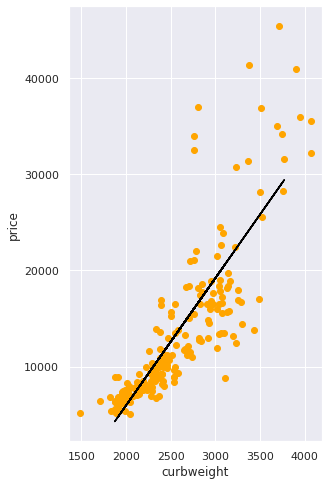

In [46]:
# menampilkan grafik dengan linear regression untuk data test dan hasil prediksinya
fig = plt.figure(figsize=(10,8))
fig.add_subplot(1,2,1)
plt.scatter(Xcp, Ycp, color='orange')
plt.plot(Xcp_test, CP_LR.predict(Xcp_test), color='black')
plt.xlabel("curbweight")
plt.ylabel("price")
plt.show()

In [47]:
# misalkan kita uji dengan data 3000 dengan hasil seharusnya sekitar 20000
print(f"X: {3000}\nY (predict): {CP_LR.predict([[3000]])}")

X: 3000
Y (predict): [[19219.06503903]]


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"


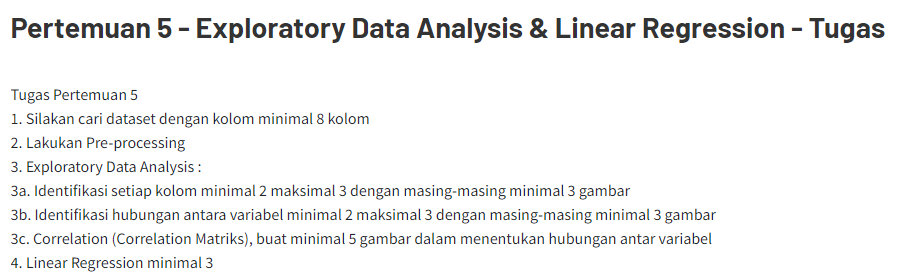